In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.types import *
from pyspark.sql import functions as sqlf
from pyspark.sql.functions import col

#Making results reproducible
import random
np.random.seed(42)
random.seed(42)

#Importing packages from sklearn
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
def readFile(filename):
  file = "/FileStore/tables/"+filename
  df = spark.read.option("header",True).option("wholeFile",True).option("escape","\"").option("multiLine",True).csv(file)
  df = df.withColumn("Date",sqlf.col("Date").cast(DateType())).withColumn("Open",sqlf.col("Open").cast(FloatType())).withColumn("High",sqlf.col("High").cast(FloatType())).withColumn("Low",sqlf.col("Low").cast(FloatType())).withColumn("Close",sqlf.col("Close").cast(FloatType())).withColumn("Adj Close",sqlf.col("Adj Close").cast(FloatType())).withColumn("Volume",sqlf.col("Volume").cast(LongType()))
  return df

df_old = readFile("AAPL_Original_Adjusted.csv")
df_new = readFile("AAPL2015_2020.csv")

display(df_new)

Date,Open,High,Low,Close,Adj Close,Volume
2015-01-02,27.8475,27.86,26.8375,27.3325,24.696352,212818400
2015-01-05,27.0725,27.1625,26.3525,26.5625,24.000614,257142000
2015-01-06,26.635,26.8575,26.1575,26.565,24.002876,263188400
2015-01-07,26.8,27.05,26.675,26.9375,24.339447,160423600
2015-01-08,27.3075,28.0375,27.175,27.9725,25.274624,237458000
2015-01-09,28.1675,28.3125,27.5525,28.0025,25.301731,214798000
2015-01-12,28.15,28.1575,27.2,27.3125,24.67828,198603200
2015-01-13,27.8575,28.2,27.2275,27.555,24.897392,268367600
2015-01-14,27.26,27.6225,27.125,27.45,24.802519,195826400
2015-01-15,27.5,27.515,26.665,26.705,24.129368,240056000


In [0]:
df_new.count()

Out[48]: 1483

In [0]:
new_pdf = df_new.toPandas()
old_pdf = df_old.toPandas()

Out[50]:

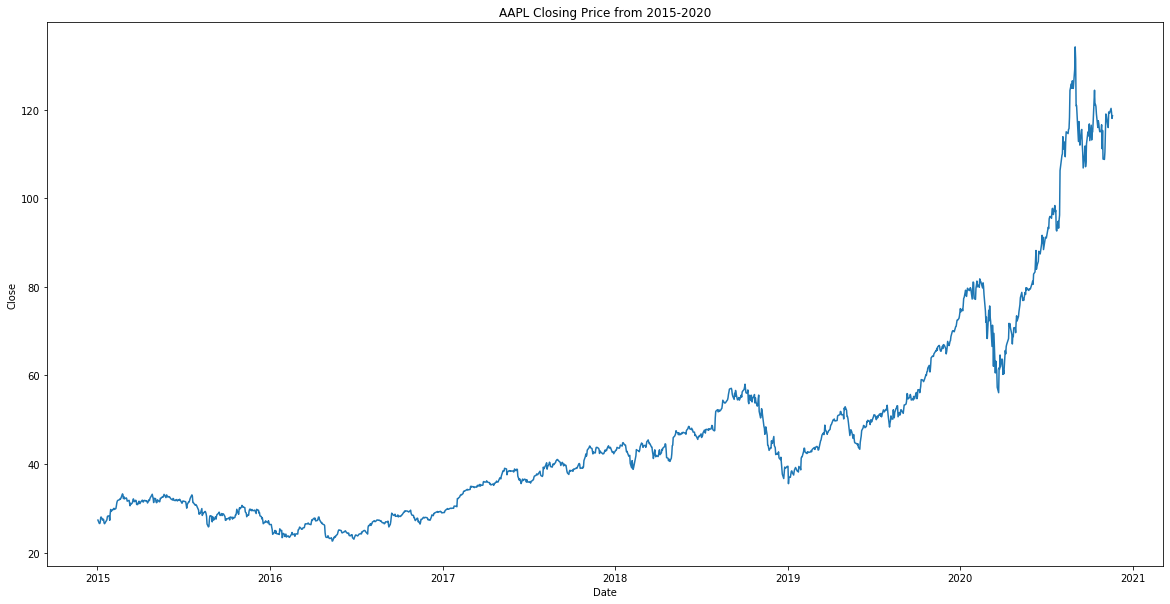

Text(0.5, 1.0, 'AAPL Closing Price from 2015-2020')

In [0]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='Date', y ='Close', data = new_pdf[['Date','Close']]).set_title('AAPL Closing Price from 2015-2020')
#display(plt)

In [0]:
def get_exp_preprocessing(df, alpha=0.9):
    edata = df.ewm(alpha=alpha).mean()
    return edata

del(old_pdf['Adj Close'])
del(old_pdf['Date'])
sold_pdf = get_exp_preprocessing(old_pdf)
del(new_pdf['Adj Close'])
del(new_pdf['Date'])
snew_pdf = get_exp_preprocessing(new_pdf)
display(snew_pdf)

Open,High,Low,Close,Volume
27.84749984741211,27.860000610351562,26.837499618530273,27.332500457763672,2.128184E8
27.142954739657316,27.225909493186258,26.39659170670943,26.63250004161488,2.5311258181818178E8
26.68533806328301,26.8940091176076,26.181193154137414,26.571689674446176,2.6218989549549547E8
26.788543440220487,27.03441426563005,26.625663075760393,26.900951893666537,1.705910696669667E8
27.255609769995402,27.93720079775108,27.12007056500542,27.865354696065573,2.3077190877508774E8
28.076311385713854,28.27497041754473,27.509257239693568,27.98878607368979,2.1639537650097653E8
28.14263080188057,28.169246413201112,27.230926382781778,27.380128546503222,2.003824160488016E8
27.886013146286434,28.19692532824241,27.22784346222196,27.537513130882374,2.615690822167468E8
27.322601520058882,27.6799420516554,27.135284346129637,27.458751999654982,2.0240066816250625E8
27.48226015202186,27.53149365583429,26.71202925854525,26.78037513123311,2.3629046681963962E8


In [0]:
display(new_pdf)

Open,High,Low,Close,Volume
27.8475,27.86,26.8375,27.3325,212818400
27.0725,27.1625,26.3525,26.5625,257142000
26.635,26.8575,26.1575,26.565,263188400
26.8,27.05,26.675,26.9375,160423600
27.3075,28.0375,27.175,27.9725,237458000
28.1675,28.3125,27.5525,28.0025,214798000
28.15,28.1575,27.2,27.3125,198603200
27.8575,28.2,27.2275,27.555,268367600
27.26,27.6225,27.125,27.45,195826400
27.5,27.515,26.665,26.705,240056000


In [0]:
"""
Indicators as shown by Peter Bakker at:
https://www.quantopian.com/posts/technical-analysis-indicators-without-talib-code
"""
# Import Built-Ins
import logging

# Import Homebrew

# Init Logging Facilities
log = logging.getLogger(__name__)

def momentum(df, n):
  """

  :param df: pandas.DataFrame 
  :param n: 
  :return: pandas.DataFrame
  """
  M = pd.Series(df['Close'].diff(n), name='Momentum_' + str(n))
  df = df.join(M)
  return df


def rate_of_change(df, n):
  """

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  M = df['Close'].diff(n - 1)
  N = df['Close'].shift(n - 1)
  ROC = pd.Series(M / N, name='ROC_' + str(n))
  df = df.join(ROC)
  return df


def average_true_range(df, n):
  """

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  i = 0
  TR_l = [0]
  while i < df.index[-1]:
    TR =max(df.loc[i+1,'High'],df.loc[i,'Close']) - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
    TR_l.append(TR)
    i = i + 1
  TR_s = pd.Series(TR_l)
  ATR = pd.Series(TR_s.ewm(span=n, min_periods=n).mean(), name='ATR_' + str(n))
  df = df.join(ATR)
  return df

def stochastic_oscillator_d(df, n):
  """Calculate stochastic oscillator %D for given data.
  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name='SO%k')
  SOd = pd.Series(SOk.ewm(span=n, min_periods=n).mean(), name='SO%d_' + str(n))#moving average of k, should usually be 3 periods but here is over n periods?
  #Seems like both %k and %d need to be above or below oversold/overbought points, currently only returns %d
  df = df.join(SOd)
  return df


def trix(df, n):
  """Calculate TRIX for given data.

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  EX1 = df['Close'].ewm(span=n, min_periods=n).mean()
  EX2 = EX1.ewm(span=n, min_periods=n).mean()
  EX3 = EX2.ewm(span=n, min_periods=n).mean()
  i = 0
  ROC_l = [np.nan]
  while i + 1 <= df.index[-1]:
      ROC = (EX3[i + 1] - EX3[i]) / EX3[i]
      ROC_l.append(ROC)
      i = i + 1
  Trix = pd.Series(ROC_l, name='Trix_' + str(n))
  df = df.join(Trix)
  return df

def vortex_indicator(df, n):
  """Calculate the Vortex Indicator for given data.

  Vortex Indicator described here:
      http://www.vortexindicator.com/VFX_VORTEX.PDF
  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  i = 0
  TR = [0]
  while i < df.index[-1]:
      Range = max(df.loc[i + 1, 'High'], df.loc[i, 'Close']) - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
      TR.append(Range)
      i = i + 1
  i = 0
  VM = [0]
  while i < df.index[-1]:
      Range = abs(df.loc[i + 1, 'High'] - df.loc[i, 'Low']) - abs(df.loc[i + 1, 'Low'] - df.loc[i, 'High'])
      VM.append(Range)
      i = i + 1
  VI = pd.Series(pd.Series(VM).rolling(n).sum() / pd.Series(TR).rolling(n).sum(), name='Vortex_' + str(n))
  df = df.join(VI)
  return df


def relative_strength_index(df, n):
  """Calculate Relative Strength Index(RSI) for given data.

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  i = 0
  UpI = [0]
  DoI = [0]
  while i + 1 <= df.index[-1]:
      UpMove = df.loc[i + 1, 'High'] - df.loc[i, 'High']
      DoMove = df.loc[i, 'Low'] - df.loc[i + 1, 'Low']
      if UpMove > DoMove and UpMove > 0:
          UpD = UpMove
      else:
          UpD = 0
      UpI.append(UpD)
      if DoMove > UpMove and DoMove > 0:
          DoD = DoMove
      else:
          DoD = 0
      DoI.append(DoD)
      i = i + 1
  UpI = pd.Series(UpI)
  DoI = pd.Series(DoI)
  PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
  NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())
  RSI = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
  df = df.join(RSI)
  return df

def accumulation_distribution(df, n):
  """Calculate Accumulation/Distribution for given data.

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  #Checking where price closed in the period and multiplying by volume
  cmfv = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']
  #Cummulative, previous period added to the next, not exactly too sure what the author is doing in the code below
  M = cmfv.diff(n - 1)
  N = cmfv.shift(n - 1)
  ROC = M / N
  AD = pd.Series(ROC, name='Acc/Dist_ROC_' + str(n))
  df = df.join(AD)
  return df

def money_flow_index(df, n):
  """Calculate Money Flow Index and Ratio for given data.

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  PP = (df['High'] + df['Low'] + df['Close']) / 3
  i = 0
  PosMF = [0]
  while i < df.index[-1]:
      if PP[i + 1] > PP[i]:
          PosMF.append(PP[i + 1] * df.loc[i + 1, 'Volume'])
      else:
          PosMF.append(0)
      i = i + 1
  PosMF = pd.Series(PosMF)
  TotMF = PP * df['Volume']
  MFR = pd.Series(PosMF / TotMF)
  MFI = pd.Series(MFR.rolling(n, min_periods=n).mean(), name='MFI_' + str(n))
  df = df.join(MFI)
  return df

def ease_of_movement(df, n):
  """Calculate Ease of Movement for given data.

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  EoM = (df['High'].diff(1) + df['Low'].diff(1)) * (df['High'] - df['Low']) / (2 * df['Volume'])
  Eom_ma = pd.Series(EoM.rolling(n, min_periods=n).mean(), name='EoM_' + str(n))
  df = df.join(Eom_ma)
  return df


def commodity_channel_index(df, n):
  """Calculate Commodity Channel Index for given data.

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  PP = (df['High'] + df['Low'] + df['Close']) / 3
  CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(),
                  name='CCI_' + str(n))
  df = df.join(CCI)
  return df

def on_balance_volume(df, n):
  """Calculate On-Balance Volume for given data.

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  i = 0
  OBV = [0]
  while i < df.index[-1]:
      if df.loc[i + 1, 'Close'] - df.loc[i, 'Close'] > 0:
          OBV.append(df.loc[i + 1, 'Volume'])
      if df.loc[i + 1, 'Close'] - df.loc[i, 'Close'] == 0:
          OBV.append(0)
      if df.loc[i + 1, 'Close'] - df.loc[i, 'Close'] < 0:
          OBV.append(-df.loc[i + 1, 'Volume'])
      i = i + 1
  OBV = pd.Series(OBV)
  OBV_ma = pd.Series(OBV.rolling(n, min_periods=n).mean(), name='OBV_' + str(n))
  df = df.join(OBV_ma)
  return df

def macd(df, n_fast, n_slow):
  """Calculate MACD, MACD Signal and MACD difference

  :param df: pandas.DataFrame
  :param n_fast: 
  :param n_slow: 
  :return: pandas.DataFrame
  """
  EMAfast = pd.Series(df['Close'].ewm(span=n_fast, min_periods=n_slow).mean())
  EMAslow = pd.Series(df['Close'].ewm(span=n_slow, min_periods=n_slow).mean())
  MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
  MACDsign = pd.Series(MACD.ewm(span=9, min_periods=9).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
  MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
  df = df.join(MACD)
  df = df.join(MACDsign)
  df = df.join(MACDdiff)
  return df

In [0]:
#This takes the formulas from Bakker and adds extra columns to the dataframe with the indicator data, this will be
#our feature matrix (X)
def feature_extraction(data):
    for x in [5, 14, 26, 44, 66]:
        data = relative_strength_index(data, n=x)
        data = stochastic_oscillator_d(data, n=x)
        data = accumulation_distribution(data, n=x)
        data = average_true_range(data, n=x)
        data = momentum(data, n=x)
        data = money_flow_index(data, n=x)
        data = rate_of_change(data, n=x)
        data = on_balance_volume(data, n=x)
        data = commodity_channel_index(data, n=x)
        data = ease_of_movement(data, n=x)
        data = trix(data, n=x)
        data = vortex_indicator(data, n=x)
    
    data['ema50'] = data['Close'] / data['Close'].ewm(50).mean()
    data['ema21'] = data['Close'] / data['Close'].ewm(21).mean()
    data['ema14'] = data['Close'] / data['Close'].ewm(14).mean()
    data['ema5'] = data['Close'] / data['Close'].ewm(5).mean()
        
    #Williams %R is missing
    data = macd(data, n_fast=12, n_slow=26)
    
    del(data['Open'])
    del(data['High'])
    del(data['Low'])
    del(data['Volume'])
    
    return data

#This returns a series that has a one if the price increase or 0 if the price decreases after n number of days
#This column will be the target vector (y)
def compute_prediction_int(df, n):
    pred = (df.shift(-n)['Close'] >= df['Close'])#returns a boolean if the price after a shifted number of days is higher or lower
    pred = pred.iloc[:-n]
    return pred.astype(int)

#This calls the feature_extraction function to add the new indicators to the dataframe as well as the compute_prediction
#that checks if the price increased or decreased after a certian "horizon"
def prepare_data(df, horizon):
    data = feature_extraction(df).dropna().iloc[:-horizon]
    data['pred'] = compute_prediction_int(data, n=horizon)
    del(data['Close'])
    return data.dropna()

In [0]:
def equivalent_type(f):
    if f == 'datetime64[ns]': return DateType()
    elif f == 'int64': return LongType()
    elif f == 'int32': return IntegerType()
    elif f == 'float64': return FloatType()
    else: return StringType()

def define_structure(string, format_type):
    try: typo = equivalent_type(format_type)
    except: typo = StringType()
    return StructField(string, typo)
  
def pandas_to_spark(pandas_df):
    columns = list(pandas_df.columns)
    types = list(pandas_df.dtypes)
    struct_list = []
    for column, typo in zip(columns, types): 
      struct_list.append(define_structure(column, typo))
    p_schema = StructType(struct_list)
    return sqlContext.createDataFrame(pandas_df, p_schema)

In [0]:
pnew_data = prepare_data(snew_pdf,10)
y = pnew_data['pred']
y.value_counts()
#Dataset pretty imbalanced, may need to stratify

Out[56]: 1.0 813
0.0 454
Name: pred, dtype: int64

In [0]:
pold_data = prepare_data(sold_pdf,10)
y = pold_data['pred']
y.value_counts()

Out[57]: 1.0 557
0.0 424
Name: pred, dtype: int64

In [0]:
#Converting from pandas df to spark df
olddata = pandas_to_spark(pold_data)
display(olddata)

RSI_5,SO%d_5,Acc/Dist_ROC_5,ATR_5,Momentum_5,MFI_5,ROC_5,OBV_5,CCI_5,EoM_5,Trix_5,Vortex_5,RSI_14,SO%d_14,Acc/Dist_ROC_14,ATR_14,Momentum_14,MFI_14,ROC_14,OBV_14,CCI_14,EoM_14,Trix_14,Vortex_14,RSI_26,SO%d_26,Acc/Dist_ROC_26,ATR_26,Momentum_26,MFI_26,ROC_26,OBV_26,CCI_26,EoM_26,Trix_26,Vortex_26,RSI_44,SO%d_44,Acc/Dist_ROC_44,ATR_44,Momentum_44,MFI_44,ROC_44,OBV_44,CCI_44,EoM_44,Trix_44,Vortex_44,RSI_66,SO%d_66,Acc/Dist_ROC_66,ATR_66,Momentum_66,MFI_66,ROC_66,OBV_66,CCI_66,EoM_66,Trix_66,Vortex_66,ema50,ema21,ema14,ema5,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,pred
0.9127811,0.7270421,-0.13652597,0.13933691,0.47122666,1.0,0.021281548,3.21743904E8,1.0309514,3.788119E-11,0.0035700742,0.92909795,0.78951776,0.6206902,0.22886783,0.12914383,0.5434138,0.71428573,0.042928133,1.58515744E8,1.8300999,1.3428166E-11,0.0017302944,0.5296862,0.7244965,0.5754974,0.038642477,0.13520283,0.71251756,0.6923077,0.056467876,8.7352584E7,2.3439848,9.4389115E-12,0.001862299,0.38862205,0.6723234,0.5548776,-2.202132,0.149827,0.6499142,0.59090906,0.058941655,1.2747409E7,2.0863326,4.047979E-12,0.0021444315,0.16763894,0.63792896,0.54718304,0.7114469,0.1637702,1.7117989,0.6212121,0.16195159,8.3363064E7,2.0097237,6.373458E-12,0.0016281771,0.2668858,1.1062291,1.0530503,1.0392318,1.0203003,0.16699412,0.13917816,0.027815966,1.0
0.96954715,0.77626294,1.1418489,0.17204745,0.4611227,1.0,0.032454092,3.24768064E8,1.6076626,4.3026912E-11,0.004418605,1.0658447,0.86567307,0.6545588,0.5414253,0.14358713,0.70491314,0.71428573,0.054963958,1.62055824E8,2.277725,2.0498547E-11,0.0018712728,0.7299128,0.78761065,0.5976609,18.618315,0.14277807,0.85232306,0.6923077,0.07655158,8.6263704E7,2.8437586,1.2731782E-11,0.0018773383,0.46992102,0.717231,0.5690938,6.1518803,0.15372266,0.8788483,0.59090906,0.07321274,3.144522E7,2.540992,5.9417475E-12,0.0021406284,0.20405239,0.66944313,0.5569841,1.6563941,0.16597562,1.8831081,0.6212121,0.1818383,8.0050912E7,2.48492,7.1795053E-12,0.0016340659,0.27892402,1.1228778,1.0681107,1.0534847,1.0316814,0.1917158,0.1496857,0.042030126,0.0
0.9772547,0.66625994,-1.2206551,0.18052003,0.3787903,1.0,0.023824578,1.72106752E8,1.2469249,4.0169906E-11,0.0049701785,0.9677701,0.8826743,0.62678486,-1.344775,0.15077087,0.6310627,0.71428573,0.05110948,1.11169504E8,1.9720442,2.126347E-11,0.002030082,0.69392043,0.8044076,0.58644557,0.03873629,0.14682896,0.8630892,0.6923077,0.06806048,8.2841296E7,2.5935383,1.3979467E-11,0.0019006722,0.49249458,0.73064023,0.5636336,-0.74699354,0.155667,0.82781315,0.59090906,0.08009509,1.4728172E7,2.4625888,6.733899E-12,0.0021391555,0.2228654,0.6794261,0.55367076,-1.098216,0.16691786,1.8732393,0.6212121,0.16374171,6.6777184E7,2.5551312,7.6838015E-12,0.0016407362,0.28967807,1.1196842,1.0644053,1.0493481,1.0259196,0.20850734,0.16145003,0.047057327,1.0
0.9772547,0.7391621,-10.454769,0.15372035,0.3728067,1.0,0.031211184,1.83040224E8,1.066252,3.459558E-11,0.0053778198,1.0018202,0.8826743,0.66120905,-3.4034002,0.14401755,0.6821773,0.71428573,0.06301038,1.14769176E8,1.7717813,2.1029206E-11,0.002205746,0.672137,0.8044076,0.60855824,-1.674863,0.14336911,0.86641634,0.6923077,0.08092949,7.8133456E7,2.3954968,1.3346524E-11,0.0019325769,0.46877122,0.73064023,0.5779167,0.11631388,0.15319802,0.99370927,0.6136364,0.082692474,3.0434444E7,2.3944952,7.1718434E-12,0.0021402389,0.24151456,0.6794261,0.5635833,-3.2897766,0.16491927,1.8057165,0.6212121,0.16586751,6.1940764E7,2.5988967,7.437041E-12,0.0016482911,0.27861932,1.124964,1.0686518,1.0529896,1.0276719,0.22637586,0.17443518,0.05194068,0.0
0.98494846,0.7189246,-0.5894669,0.13563484,0.42138845,1.0,0.028717358,1.83476864E8,1.0196713,3.4495462E-11,0.005583528,0.97757256,0.89808863,0.66350776,-0.22454506,0.13807705,0.7779319,0.78571427,0.06451263,1.52357312E8,1.6501349,2.290045E-11,0.0023880985,0.7466314,0.81936437,0.6137354,-0.55694675,0.14011687,0.969606,0.6923077,0.07725605,1.04863496E8,2.260992,1.3619421E-11,0.0019716595,0.50737184,0.7426379,0.5823853,0.40825233,0.15080957,0.9881211,0.6363636,0.090776935,2.8

In [0]:
#Creating features column
ignore = ['pred','gain']
assembler = VectorAssembler(
    inputCols=[x for x in olddata.columns if x not in ignore],
    outputCol='features')

assem_df = assembler.transform(olddata)

#Splitting the data into 2/3 for training and 1/3 for testing
seed = 42
oldtrain, oldtest = assem_df.randomSplit([2/3, 1/3], seed = seed)
print("Training Dataset Count: " + str(oldtrain.count()))
print("Test Dataset Count: " + str(oldtest.count()))

Training Dataset Count: 646
Test Dataset Count: 335

In [0]:
classcheck = assem_df.groupBy('pred').count()
display(classcheck)

pred,count
1.0,557
0.0,424


In [0]:
model=RandomForestClassifier(featuresCol = 'features', labelCol = 'pred').setNumTrees(65)
rfmodel = model.fit(oldtrain)
oldpred = rfmodel.transform(oldtest).select(sqlf.col('pred').alias('label'), 'prediction')

In [0]:
oldpred.show(5)

+-----+----------+
label|prediction|
+-----+----------+
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 0.0| 1.0|
+-----+----------+
only showing top 5 rows

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(oldpred)
print("Test Error = %g" % (1.0 - accuracy))
print("Accuracy =%g" % accuracy)

Test Error = 0.197015
Accuracy =0.802985

In [0]:
f1evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1")
f1 = f1evaluator.evaluate(oldpred)
print("F1 score = %g" % (f1))

F1 score = 0.791509

In [0]:
def plotConfusion(confusion):
  ax = plt.axes()
  labels = ["increase","decrease"]
  sns.heatmap(confusion, annot = True, xticklabels=labels, yticklabels=labels, fmt='g', ax=ax)
  ax.set_ylabel("true value")
  ax.set_xlabel("predicted value")
  plt.show()

In [0]:
def accuracy(tp, fp, tn, fn):
  right=tp+tn
  wrong = fp+fn
  total = right+wrong
  return right/total

def precision(tp, fp):
  return tp/(tp+fp)

def recall(tp, fn):
  return tp/(tp+fn)

def f1score(precision, recall):
  return (2*precision*recall)/(precision+recall)

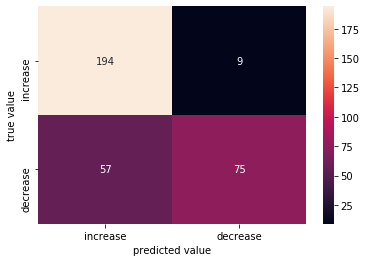

In [0]:
TP = oldpred.where("label == prediction and label = 1").count()
TN = oldpred.where("label == prediction and label = 0").count()
FP = oldpred.where("label != prediction and label = 0").count()
FN = oldpred.where("label != prediction and label = 1").count()
confusion = [[TP,FN],[FP,TN]]
plotConfusion(confusion)

In [0]:
print("Accuracy =%g" % accuracy(TP, FP, TN, FN))
print("Precision =%g" % precision(TP, FP))
print("Recall =%g" % recall(TP, FN))
print("F1 Score =%g" % f1score(precision(TP, FP),recall(TP, FN)))

Accuracy =0.802985
Precision =0.772908
Recall =0.955665
F1 Score =0.854626

In [0]:
#Assembing all the features into one column
newdata = pandas_to_spark(pnew_data)
newassembler = VectorAssembler(
    inputCols=[x for x in olddata.columns if x not in ignore],
    outputCol='features')
newdata = newassembler.transform(newdata)
newtrain, newtest = newdata.randomSplit([2/3, 1/3], seed = seed)
print("Training Dataset Count: " + str(newtrain.count()))
print("Test Dataset Count: " + str(newtest.count()))

Training Dataset Count: 830
Test Dataset Count: 437

In [0]:
classcheck = newdata.groupBy('pred').count()
display(classcheck)

pred,count
1.0,813
0.0,454


In [0]:
model=RandomForestClassifier(featuresCol = 'features', labelCol = 'pred').setNumTrees(65)
rfmodel = model.fit(newtrain)

In [0]:
newpred = rfmodel.transform(newtest).select(sqlf.col('pred').alias('label'), 'prediction','Probability')
display(newpred)

label,prediction,Probability
0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.5601104314381726, 0.4398895685618274))"
1.0,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.45416705117631945, 0.5458329488236805))"
1.0,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.499979853888476, 0.500020146111524))"
0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.5078298177813404, 0.4921701822186595))"
0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.5122170339377516, 0.4877829660622483))"
1.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.6649324871724954, 0.33506751282750474))"
1.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.5472137654813353, 0.4527862345186646))"
1.0,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.49032167696678436, 0.5096783230332157))"
0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.522283227420107, 0.4777167725798931))"
0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.6424665078770878, 0.35753349212291213))"


Out[73]:

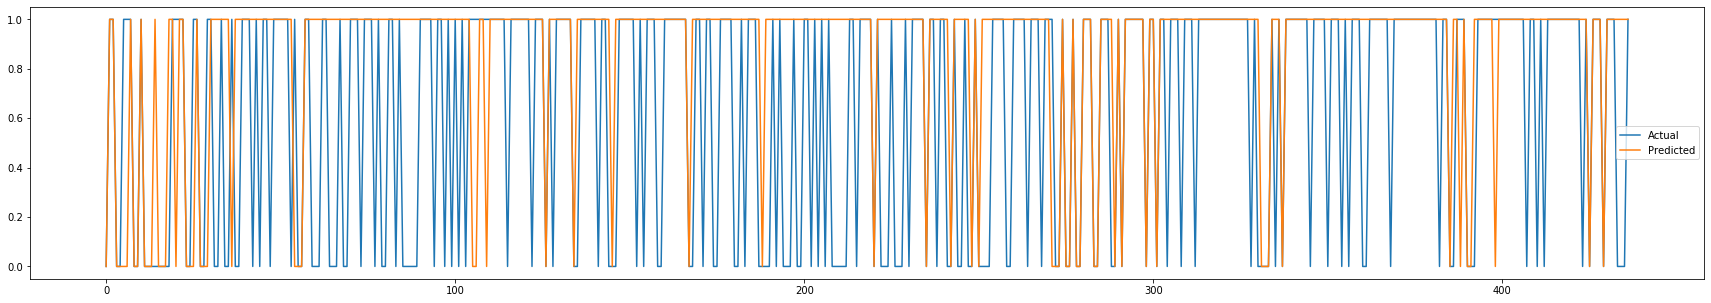

<matplotlib.legend.Legend at 0x7f0f244dbd50>

In [0]:
newlabel = newpred.select('label').rdd.flatMap(lambda x:x).collect()
newprediction = newpred.select('prediction').rdd.flatMap(lambda x:x).collect()
y = [0,1]

fig, ax = plt.subplots(figsize=(30, 5))
plt.plot(newlabel,label = "Actual")
plt.plot(newprediction,label = "Predicted")

plt.legend()
#display(plt)

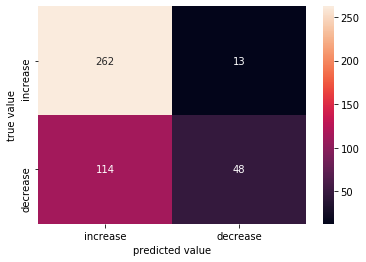

114

In [0]:
newTP = newpred.where("label == prediction and label = 1").count()
newTN = newpred.where("label == prediction and label = 0").count()
newFP = newpred.where("label != prediction and label = 0").count()
newFN = newpred.where("label != prediction and label = 1").count()
newconfusion = [[newTP,newFN],[newFP,newTN]]
plotConfusion(newconfusion)
print(newFP)

In [0]:
print("Accuracy =%g" % accuracy(newTP, newFP, newTN, newFN))
print("Precision =%g" % precision(newTP, newFP))
print("Recall =%g" % recall(newTP, newFN))
print("F1 Score =%g" % f1score(precision(newTP, newFP),recall(newTP, newFN)))

Accuracy =0.709382
Precision =0.696809
Recall =0.952727
F1 Score =0.804916

In [0]:
pos = newdata.filter(col('pred')==1)
neg = newdata.filter(col('pred')!=1)
ratio = pos.count()/neg.count()
print(ratio)

1.7907488986784141

In [0]:
from pyspark.sql.functions import explode,array,lit
# duplicate the minority rows
a = range(2)
oversampled_df = neg.withColumn("dummy", explode(array([lit(x) for x in a]))).drop('dummy')
# combine both oversampled minority rows and previous majority rows 
combined_df = pos.unionAll(oversampled_df)

In [0]:
newtrainres, newtestres = combined_df.randomSplit([2/3, 1/3], seed = seed)
print("Training Dataset Count: " + str(newtrainres.count()))
print("Test Dataset Count: " + str(newtestres.count()))

Training Dataset Count: 1149
Test Dataset Count: 572

In [0]:
classcheck = newtrainres.groupBy('pred').count()
display(classcheck)

pred,count
1.0,529
0.0,620


In [0]:
rfmodel = model.fit(newtrainres)
newpredres = rfmodel.transform(newtestres).select(sqlf.col('pred').alias('label'), 'prediction','Probability')

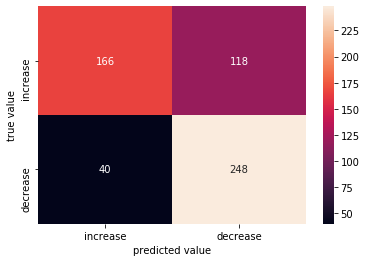

In [0]:
newTPres = newpredres.where("label == prediction and label = 1").count()
newTNres = newpredres.where("label == prediction and label = 0").count()
newFPres = newpredres.where("label != prediction and label = 0").count()
newFNres = newpredres.where("label != prediction and label = 1").count()
newconfusionres = [[newTPres,newFNres],[newFPres,newTNres]]
plotConfusion(newconfusionres)

In [0]:
print("Accuracy =%g" % accuracy(newTPres, newFPres, newTNres, newFNres))
print("Precision =%g" % precision(newTPres, newFPres))
print("Recall =%g" % recall(newTPres, newFNres))
print("F1 Score =%g" % f1score(precision(newTPres, newFPres),recall(newTPres, newFNres)))

Accuracy =0.723776
Precision =0.805825
Recall =0.584507
F1 Score =0.677551

In [0]:
sampled_majority_df = pos.sample(False, 1/ratio)
undersample_new_df = sampled_majority_df.unionAll(neg)
newtrainres, newtestres = undersample_new_df.randomSplit([2/3, 1/3], seed = seed)
print("Training Dataset Count: " + str(newtrainres.count()))
print("Test Dataset Count: " + str(newtestres.count()))

Training Dataset Count: 604
Test Dataset Count: 308

In [0]:
classcheck = undersample_new_df.groupBy('pred').count()
display(classcheck)

pred,count
1.0,458
0.0,454


In [0]:
rfmodel = model.fit(newtrainres)
newpredres = rfmodel.transform(newtestres).select(sqlf.col('pred').alias('label'), 'prediction','Probability')

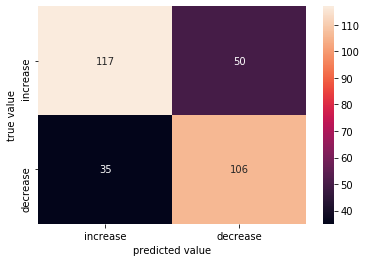

In [0]:
newTPres = newpredres.where("label == prediction and label = 1").count()
newTNres = newpredres.where("label == prediction and label = 0").count()
newFPres = newpredres.where("label != prediction and label = 0").count()
newFNres = newpredres.where("label != prediction and label = 1").count()
newconfusionres = [[newTPres,newFNres],[newFPres,newTNres]]
plotConfusion(newconfusionres)

In [0]:
print("Accuracy =%g" % accuracy(newTPres, newFPres, newTNres, newFNres))
print("Precision =%g" % precision(newTPres, newFPres))
print("Recall =%g" % recall(newTPres, newFNres))
print("F1 Score =%g" % f1score(precision(newTPres, newFPres),recall(newTPres, newFNres)))

Accuracy =0.724026
Precision =0.769737
Recall =0.700599
F1 Score =0.733542

In [0]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

model=RandomForestClassifier()
paramGrid = ParamGridBuilder().addGrid(model.numTrees, [50, 55, 60, 65, 70, 75]).addGrid(model.maxDepth, [2, 4, 6, 8, 10, 12]).build()
crossval = CrossValidator( estimator=model,estimatorParamMaps=paramGrid,evaluator=BinaryClassificationEvaluator(),numFolds=3)
newtraincv=newtrain.select('features',col('pred').alias('label'))
cvModel = crossval.fit(newtraincv)

/databricks/spark/python/pyspark/ml/util.py:762: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [0]:
bestModel = cvModel.bestModel
print("Best number of trees: ", bestModel._java_obj.getNumTrees())
print("Best depth: ", bestModel._java_obj.getMaxDepth())

Best number of trees: 60
Best depth: 12

In [0]:
newtestcv = newtest.select('features',col('pred').alias('label'))
cvPred = cvModel.transform(newtestcv).select('label', 'prediction','Probability')

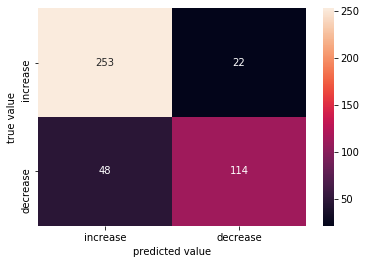

In [0]:
cvTP = cvPred.where("label == prediction and label = 1").count()
cvTN = cvPred.where("label == prediction and label = 0").count()
cvFP = cvPred.where("label != prediction and label = 0").count()
cvFN = cvPred.where("label != prediction and label = 1").count()
cvconfusion = [[cvTP,cvFN],[cvFP,cvTN]]
plotConfusion(cvconfusion)

In [0]:
print("Accuracy =%g" % accuracy(cvTP, cvFP, cvTN, cvFN))
print("Precision =%g" % precision(cvTP, cvFP))
print("Recall =%g" % recall(cvTP, cvFN))
print("F1 Score =%g" % f1score(precision(cvTP, cvFP),recall(cvTP, cvFN)))

Accuracy =0.839817
Precision =0.840532
Recall =0.92
F1 Score =0.878472

In [0]:
model=RandomForestClassifier()
newparamGrid = ParamGridBuilder().addGrid(model.numTrees, [55, 60, 65]).addGrid(model.maxDepth, [10, 12, 14, 16]).build()
newcrossval = CrossValidator( estimator=model,estimatorParamMaps=newparamGrid,evaluator=BinaryClassificationEvaluator(),numFolds=3)
newcvModel = newcrossval.fit(newtraincv)

In [0]:
bestnewModel = newcvModel.bestModel
print("Best number of trees: ", bestnewModel._java_obj.getNumTrees())
print("Best depth: ", bestnewModel._java_obj.getMaxDepth())

Best number of trees: 60
Best depth: 16

In [0]:
newnewparamGrid = ParamGridBuilder().addGrid(model.numTrees, [60]).addGrid(model.maxDepth, [12, 16, 20, 24]).build()
newnewcrossval = CrossValidator( estimator=model,estimatorParamMaps=newparamGrid,evaluator=BinaryClassificationEvaluator(),numFolds=3)
newnewcvModel = newnewcrossval.fit(newtraincv)

In [0]:
bestnewnewModel = newnewcvModel.bestModel
print("Best number of trees: ", bestnewnewModel._java_obj.getNumTrees())
print("Best depth: ", bestnewnewModel._java_obj.getMaxDepth())

Best number of trees: 60
Best depth: 16

In [0]:
newcvPred = newcvModel.transform(newtestcv).select('label', 'prediction','Probability')

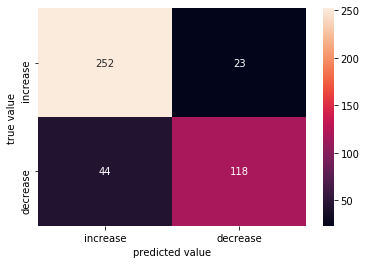

In [0]:
newcvTP = newcvPred.where("label == prediction and label = 1").count()
newcvTN = newcvPred.where("label == prediction and label = 0").count()
newcvFP = newcvPred.where("label != prediction and label = 0").count()
newcvFN = newcvPred.where("label != prediction and label = 1").count()
newcvconfusion = [[newcvTP,newcvFN],[newcvFP,newcvTN]]
plotConfusion(newcvconfusion)

In [0]:
print("Accuracy =%g" % accuracy(newcvTP, newcvFP, newcvTN, newcvFN))
print("Precision =%g" % precision(newcvTP, newcvFP))
print("Recall =%g" % recall(newcvTP, newcvFN))
print("F1 Score =%g" % f1score(precision(newcvTP, newcvFP),recall(newcvTP, newcvFN)))

Accuracy =0.846682
Precision =0.851351
Recall =0.916364
F1 Score =0.882662

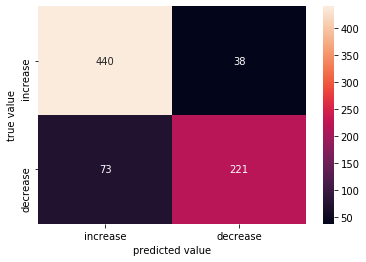

In [0]:
tottrain = oldtrain.select('features',col('pred').alias('label')).union(newtraincv)
tottest = oldtest.select('features',col('pred').alias('label')).union(newtestcv)

model=RandomForestClassifier(featuresCol = 'features', labelCol = 'label').setNumTrees(60).setMaxDepth(16)
rfmodel = model.fit(tottrain)
totpred = rfmodel.transform(tottest).select('label', 'prediction')

totTP = totpred.where("label == prediction and label = 1").count()
totTN = totpred.where("label == prediction and label = 0").count()
totFP = totpred.where("label != prediction and label = 0").count()
totFN = totpred.where("label != prediction and label = 1").count()
totconfusion = [[totTP,totFN],[totFP,totTN]]
plotConfusion(totconfusion)

In [0]:
print("Accuracy =%g" % accuracy(totTP, totFP, totTN, totFN))
print("Precision =%g" % precision(totTP, totFP))
print("Recall =%g" % recall(totTP, totFN))
print("F1 Score =%g" % f1score(precision(totTP, totFP),recall(totTP, totFN)))

Accuracy =0.856218
Precision =0.8577
Recall =0.920502
F1 Score =0.887992

In [0]:
from pyspark.ml.classification import LogisticRegression
# Family = "binomial" to train a logistic regression model
lr = LogisticRegression(maxIter=10, featuresCol = 'features', labelCol = 'pred')
lrModel = lr.fit(newtrain)
predictions = lrModel.transform(newtest)
# Print the coefficients and intercept for logistic regression
predictions.select('pred', 'features', 'rawPrediction', 'prediction', 'probability').toPandas().head(5)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:93: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
 warnings.warn(msg)
Out[104]:

,pred,features,rawPrediction,prediction,probability
0,0.0,"[0.0036415299400687218, 0.40896308422088623, -...","[0.3675920813191892, -0.3675920813191892]",0.0,"[0.5908770125049755, 0.4091229874950246]"
1,1.0,"[0.02327648364007473, 0.43134602904319763, -2....","[-0.06899508085508554, 0.06899508085508554]",1.0,"[0.48275806900441076, 0.5172419309955891]"
2,1.0,"[0.03342257812619209, 0.20218606293201447, 2.1...","[0.03386180295448926, -0.03386180295448926]",0.0,"[0.5084646419422346, 0.4915353580577654]"
3,0.0,"[0.03555238991975784, 0.26278987526893616, -2....","[0.27566761522893746, -0.27566761522893746]",0.0,"[0.568483763634857, 0.4315162363651431]"
4,0.0,"[0.03608982264995575, 0.4241689145565033, -23....","[0.11533386740681206, -0.11533386740681206]",0.0,"[0.528801547649578, 0.471198452350422]"


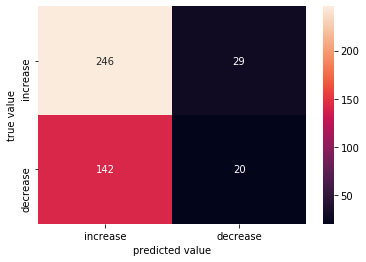

In [0]:
TP = predictions.where("pred == prediction and pred = 1").count()
TN = predictions.where("pred == prediction and pred = 0").count()
FP = predictions.where("pred != prediction and pred = 0").count()
FN = predictions.where("pred != prediction and pred = 1").count()
confusion = [[TP,FN],[FP,TN]]
plotConfusion(confusion)

In [0]:
print("Accuracy =%g" % accuracy(TP, FP, TN, FN))
print("Precision =%g" % precision(TP, FP))
print("Recall =%g" % recall(TP, FN))
print("F1 Score =%g" % f1score(precision(TP, FP),recall(TP, FN)))

Accuracy =0.608696
Precision =0.634021
Recall =0.894545
F1 Score =0.742081

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col
evaluator = BinaryClassificationEvaluator()
lr = LogisticRegression( featuresCol = 'features')
# create grid for cross validation
paramGrid = (ParamGridBuilder().addGrid(lr.regParam, [0.01,0.5,2.0]).addGrid(lr.elasticNetParam, [0.0,0.5,1.0]).addGrid(lr.maxIter, [1,5,10]).build())
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid,evaluator=evaluator,numFolds=5)
newtraincv = newtrain.select('features', col('pred').alias('label'))
cvModel=cv.fit(newtraincv)

/databricks/spark/python/pyspark/ml/util.py:762: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [0]:
## Evaluate Best Model
newtestcv = newtest.select('features', col('pred').alias('label'))
predictions = cvModel.transform(newtestcv)
print('Best Model Test Area Under ROC', evaluator.evaluate(predictions))

Best Model Test Area Under ROC 0.6123007856341189

In [0]:
bestModel = cvModel.bestModel
bestModel.extractParamMap()

Out[112]: {Param(parent='LogisticRegression_8dabb9ec4e0a', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 2,
 Param(parent='LogisticRegression_8dabb9ec4e0a', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0,
 Param(parent='LogisticRegression_8dabb9ec4e0a', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial'): 'auto',
 Param(parent='LogisticRegression_8dabb9ec4e0a', name='featuresCol', doc='features column name.'): 'features',
 Param(parent='LogisticRegression_8dabb9ec4e0a', name='fitIntercept', doc='whether to fit an intercept term.'): True,
 Param(parent='LogisticRegression_8dabb9ec4e0a', name='labelCol', doc='label column name.'): 'label',
 Param(parent='LogisticRegression_8dabb9ec4e0a', name='maxIter', doc='max number of iterations (>= 0).'): 10,
 Param(parent='LogisticRegression_8dabb9ec4e0a', name='predictionCol', doc='prediction column name.'): 'prediction',
 Param(parent='LogisticRegression_8dabb9ec4e0a', name='probabilityCol', doc='Column name for predicted class conditional probabilities. Note: Not all models output well-calibrated probability estimates! These probabilities should be treated as confidences, not precise probabilities.'): 'probability',
 Param(parent='LogisticRegression_8dabb9ec4e0a', name='rawPredictionCol', doc='raw prediction (a.k.a. confidence) column name.'): 'rawPrediction',
 Param(parent='LogisticRegression_8dabb9ec4e0a', name='regParam', doc='regularization parameter (>= 0).'): 0.5,
 Param(parent='LogisticRegression_8dabb9ec4e0a', name='standardization', doc='whether to standardize the training features before fitting the model.'): True,
 Param(parent='LogisticRegression_8dabb9ec4e0a', name='threshold', doc='Threshold in binary classification prediction, in range [0, 1]. If threshold and thresholds are both set, they must match.e.g. if threshold is p, then thresholds must be equal to [1-p, p].'): 0.5,
 Param(parent='LogisticRegression_8dabb9ec4e0a', name='tol', doc='the convergence tolerance for iterative algorithms (>= 0).'): 1e-06}

In [0]:
lr = LogisticRegression(regParam = 0.5,elasticNetParam = 0,maxIter = 10, featuresCol = 'features', labelCol = 'pred')
lrModel = lr.fit(newtrain)
predictions = lrModel.transform(newtest)
# Print the coefficients and intercept for logistic regression
predictions.select('pred', 'features', 'rawPrediction', 'prediction', 'probability').toPandas().head(5)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:93: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
 warnings.warn(msg)
Out[113]:

,pred,features,rawPrediction,prediction,probability
0,0.0,"[0.0036415299400687218, 0.40896308422088623, -...","[0.1856106456915131, -0.1856106456915131]",0.0,"[0.5462698994069578, 0.4537301005930422]"
1,1.0,"[0.02327648364007473, 0.43134602904319763, -2....","[-0.16926868762445335, 0.16926868762445335]",1.0,"[0.4577835783432167, 0.5422164216567833]"
2,1.0,"[0.03342257812619209, 0.20218606293201447, 2.1...","[-0.10037584468336214, 0.10037584468336214]",1.0,"[0.4749270867432241, 0.5250729132567759]"
3,0.0,"[0.03555238991975784, 0.26278987526893616, -2....","[0.13395045757403723, -0.13395045757403723]",0.0,"[0.5334376324845267, 0.4665623675154733]"
4,0.0,"[0.03608982264995575, 0.4241689145565033, -23....","[-0.06147349418285897, 0.06147349418285897]",1.0,"[0.4846364643708353, 0.5153635356291647]"


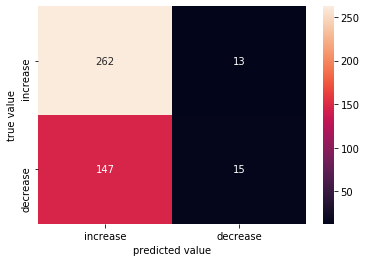

In [0]:
TP = predictions.where("pred == prediction and pred = 1").count()
TN = predictions.where("pred == prediction and pred = 0").count()
FP = predictions.where("pred != prediction and pred = 0").count()
FN = predictions.where("pred != prediction and pred = 1").count()
confusion = [[TP,FN],[FP,TN]]
plotConfusion(confusion)

In [0]:
print("Accuracy =%g" % accuracy(TP, FP, TN, FN))
print("Precision =%g" % precision(TP, FP))
print("Recall =%g" % recall(TP, FN))
print("F1 Score =%g" % f1score(precision(TP, FP),recall(TP, FN)))

Accuracy =0.633867
Precision =0.640587
Recall =0.952727
F1 Score =0.766082

In [0]:
from pyspark.ml.classification import GBTClassifier
 
gbt = GBTClassifier(labelCol='pred', featuresCol='features')
gbtModel = gbt.fit(newtrain)
predictions = gbtModel.transform(newtest)
predictions.select('pred', 'features', 'rawPrediction', 'prediction', 'probability').toPandas().head(5)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:93: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
 warnings.warn(msg)
Out[116]:

,pred,features,rawPrediction,prediction,probability
0,0.0,"[0.0036415299400687218, 0.40896308422088623, -...","[1.0275459195896666, -1.0275459195896666]",0.0,"[0.8864611105213742, 0.11353888947862578]"
1,1.0,"[0.02327648364007473, 0.43134602904319763, -2....","[-0.8240679805573858, 0.8240679805573858]",1.0,"[0.16136103892889972, 0.8386389610711003]"
2,1.0,"[0.03342257812619209, 0.20218606293201447, 2.1...","[-0.3063371025487876, 0.3063371025487876]",1.0,"[0.3514494171911179, 0.6485505828088821]"
3,0.0,"[0.03555238991975784, 0.26278987526893616, -2....","[-0.7348796312896476, 0.7348796312896476]",1.0,"[0.18697920762758324, 0.8130207923724168]"
4,0.0,"[0.03608982264995575, 0.4241689145565033, -23....","[0.2920415196084229, -0.2920415196084229]",0.0,"[0.6420063714718667, 0.3579936285281333]"


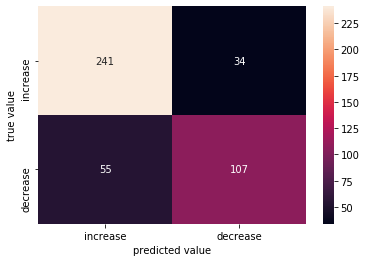

In [0]:
TP = predictions.where("pred == prediction and pred = 1").count()
TN = predictions.where("pred == prediction and pred = 0").count()
FP = predictions.where("pred != prediction and pred = 0").count()
FN = predictions.where("pred != prediction and pred = 1").count()
confusion = [[TP,FN],[FP,TN]]
plotConfusion(confusion)

In [0]:
print("Accuracy =%g" % accuracy(TP, FP, TN, FN))
print("Precision =%g" % precision(TP, FP))
print("Recall =%g" % recall(TP, FN))
print("F1 Score =%g" % f1score(precision(TP, FP),recall(TP, FN)))

Accuracy =0.796339
Precision =0.814189
Recall =0.876364
F1 Score =0.844133

In [0]:
evaluator = BinaryClassificationEvaluator()
gbt = GBTClassifier(featuresCol = 'features')
# create grid for cross validation
paramGrid = (ParamGridBuilder().addGrid(gbt.maxIter, [25, 30, 35]).addGrid(gbt.stepSize, [0.1, 0.5, 1]).build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid,evaluator=evaluator,numFolds=3)
newtraincv = newtrain.select('features', col('pred').alias('label'))
cvModel=cv.fit(newtraincv)

/databricks/spark/python/pyspark/ml/util.py:762: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [0]:
newtestcv = newtest.select('features', col('pred').alias('label'))
predictions = cvModel.transform(newtestcv)
print('Best Model Test Area Under ROC', evaluator.evaluate(predictions))

Best Model Test Area Under ROC 0.8496745230078563

In [0]:
bestModel = cvModel.bestModel
print("Best Iterations: ", bestModel._java_obj.getMaxIter())
print("Best Step Size: ", bestModel._java_obj.getStepSize())

Best Iterations: 35
Best Step Size: 0.5

In [0]:
gbt = GBTClassifier(labelCol='pred', featuresCol='features', maxIter=35, stepSize=0.5)
gbtModel = gbt.fit(newtrain)
predictions = gbtModel.transform(newtest)
predictions.select('pred', 'features', 'rawPrediction', 'prediction', 'probability').toPandas().head(5)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:93: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
 warnings.warn(msg)
Out[122]:

,pred,features,rawPrediction,prediction,probability
0,0.0,"[0.0036415299400687218, 0.40896308422088623, -...","[1.5854719898932292, -1.5854719898932292]",0.0,"[0.9597260870514354, 0.04027391294856464]"
1,1.0,"[0.02327648364007473, 0.43134602904319763, -2....","[-0.44234262016223824, 0.44234262016223824]",1.0,"[0.2922078236725838, 0.7077921763274162]"
2,1.0,"[0.03342257812619209, 0.20218606293201447, 2.1...","[-0.5973693369373368, 0.5973693369373368]",1.0,"[0.23241249919666193, 0.767587500803338]"
3,0.0,"[0.03555238991975784, 0.26278987526893616, -2....","[-1.9510971951554184, 1.9510971951554184]",1.0,"[0.01979767708734615, 0.9802023229126539]"
4,0.0,"[0.03608982264995575, 0.4241689145565033, -23....","[0.9818533876599622, -0.9818533876599622]",0.0,"[0.8769335509587055, 0.12306644904129449]"


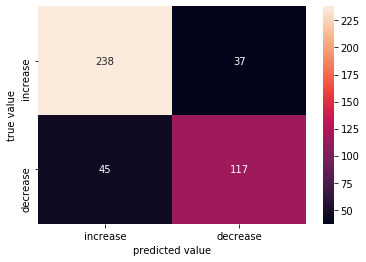

In [0]:
TP = predictions.where("pred == prediction and pred = 1").count()
TN = predictions.where("pred == prediction and pred = 0").count()
FP = predictions.where("pred != prediction and pred = 0").count()
FN = predictions.where("pred != prediction and pred = 1").count()
confusion = [[TP,FN],[FP,TN]]
plotConfusion(confusion)

In [0]:
print("Accuracy =%g" % accuracy(TP, FP, TN, FN))
print("Precision =%g" % precision(TP, FP))
print("Recall =%g" % recall(TP, FN))
print("F1 Score =%g" % f1score(precision(TP, FP),recall(TP, FN)))

Accuracy =0.812357
Precision =0.840989
Recall =0.865455
F1 Score =0.853047

In [0]:
from pyspark.sql.functions import col, when
 
misclassificationDF = newcvPred.where("label != prediction").select('label', 'prediction')
 
misclassificationDF = misclassificationDF.withColumn("MisclassificationLabel", when(col('prediction')>0, "False Positive").otherwise("False Negative"))
display(misclassificationDF)

label,prediction,MisclassificationLabel
1.0,0.0,False Negative
0.0,1.0,False Positive
1.0,0.0,False Negative
1.0,0.0,False Negative
0.0,1.0,False Positive
0.0,1.0,False Positive
1.0,0.0,False Negative
0.0,1.0,False Positive
0.0,1.0,False Positive
0.0,1.0,False Positive


In [0]:
print("Total Misclassifications:", misclassificationDF.count())

Total Misclassifications: 67

In [0]:
display(misclassificationDF.groupBy('MisclassificationLabel').count())

MisclassificationLabel,count
False Negative,23
False Positive,44


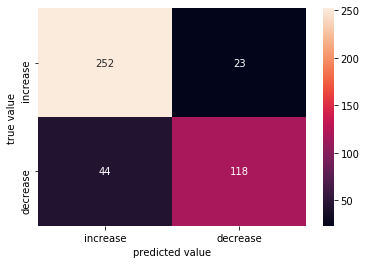

In [0]:
plotConfusion(newcvconfusion)